In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rice_ml.unsupervised_learning import PCA

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 5)

df = pd.read_csv("../data/lesions_processed.csv")

features = ["x_norm", "y_norm", "slice_norm", "r_xy"]
X = df[features].values
y = df["tampered"].values


In [2]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape
pca.explained_variance_ratio_


array([9.99996725e-01, 2.07499768e-06])

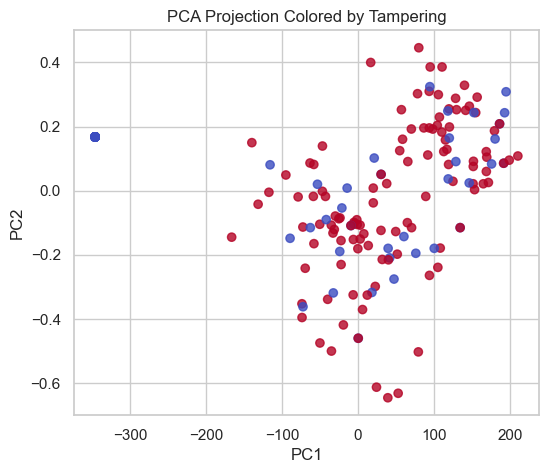

In [3]:
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y,
    cmap="coolwarm",
    alpha=0.8
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection Colored by Tampering")
plt.show()


Coloring by tampering status reveals partial separation along the first principal component, suggesting that spatial features encode information relevant to detecting tampering

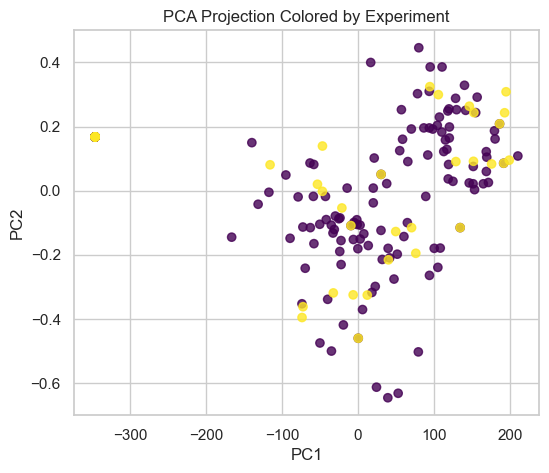

In [4]:
#experiment bias
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df["experiment"],
    cmap="viridis",
    alpha=0.8
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection Colored by Experiment")
plt.show()


The PCA projection shows substantial overlap between Experiment 1 and Experiment 2, indicating that experiment knowledge alone does not explain most of the variance in lesion features!